<a href="https://colab.research.google.com/github/yuji-matsunami/kaggle_cifar-10/blob/augment/kaggle_cifar_10_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow

tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!cp /content/drive/MyDrive/データサイエンス/cifar-10.zip .
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [ ]:
!7z x /content/train.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2% - train/1.png                    2% 1078 - train/10969.png                             2% 1564 - train/11405.png                             4% 1868 - train/1168.png                            6% 1892 - train/11700.png                           

In [ ]:
TRAIN_BASE_DIR = "content/train"
CATEGORYS = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(len(CATEGORYS))

10


In [ ]:
from tensorflow.keras.preprocessing.image import  load_img,img_to_array,array_to_img
from glob import glob
import csv
from natsort import natsorted
file_dir="/content/train"
train_img = []
train_label = []
files = glob(file_dir + "/*.png")

csv_file = open("/content/trainLabels.csv", "r", encoding="utf_8", errors="", newline="")
label_read = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
label_list = []
for row in label_read:
    label_list.append(row)

print(label_list[1])
i = 0
for file_name in natsorted(files):
    # print(file_name)
    img = load_img(file_name,color_mode="rgb", target_size=(32,32))
    array = img_to_array(img)
    train_img.append(array)
    categorys_num = CATEGORYS.index(label_list[i+1][1])
    train_label.append(categorys_num)
    i += 1

print(train_label[0])



['1', 'frog']
6


frog


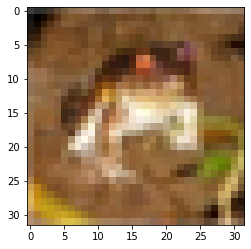

truck


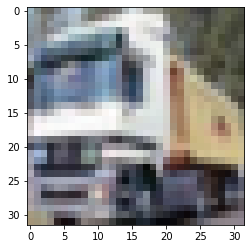

truck


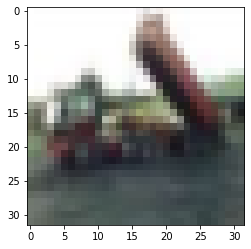

deer


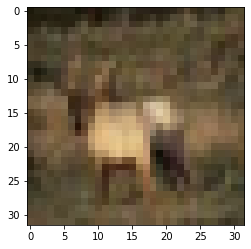

automobile


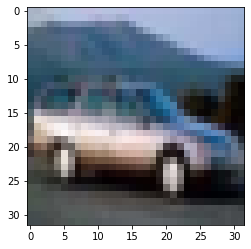

automobile


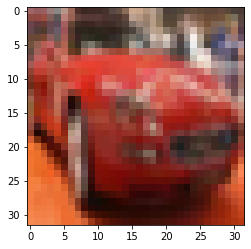

bird


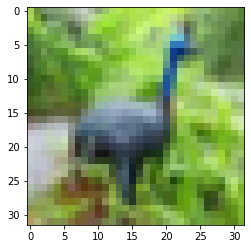

horse


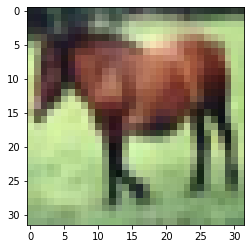

ship


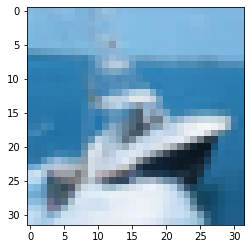

cat


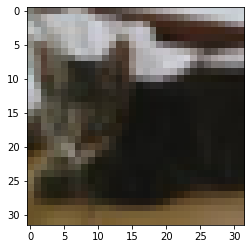

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
train_img = np.array(train_img)
train_label = np.array(train_label)
train_img = train_img.astype('float32') / 255
train_label = to_categorical(train_label,10)
"""
print(type(train_img[0]))
print(train_img[0])
np_img = train_img[0]
plt.imshow(np_img)
plt.show()
"""
for i in range(len(train_img)):
    plt.imshow(train_img[i])
    print(CATEGORYS[np.argmax(train_label[i])])
    plt.show()
    if i == 9:
        break

In [ ]:
from tensorflow.keras.datasets import cifar10

(a,b), (val_img, val_label) = cifar10.load_data()
val_img = val_img.astype("float32")/255
val_label = to_categorical(val_label, 10)

[[[0.8509804  0.84313726 0.81960785]
  [0.8235294  0.8156863  0.7921569 ]
  [0.8039216  0.8156863  0.7490196 ]
  ...
  [0.6666667  0.72156864 0.6156863 ]
  [0.6313726  0.6901961  0.58431375]
  [0.63529414 0.64705884 0.58431375]]

 [[0.87058824 0.8862745  0.83137256]
  [0.8666667  0.8784314  0.83137256]
  [0.8627451  0.88235295 0.8235294 ]
  ...
  [0.7176471  0.74509805 0.6666667 ]
  [0.7294118  0.7490196  0.6784314 ]
  [0.78431374 0.77254903 0.7294118 ]]

 [[0.91764706 0.92156863 0.9019608 ]
  [0.9137255  0.91764706 0.8980392 ]
  [0.90588236 0.91764706 0.8901961 ]
  ...
  [0.7921569  0.80784315 0.7372549 ]
  [0.8156863  0.81960785 0.77254903]
  [0.827451   0.8235294  0.7764706 ]]

 ...

 [[0.63529414 0.627451   0.78039217]
  [0.5921569  0.5803922  0.7607843 ]
  [0.5764706  0.57254905 0.7607843 ]
  ...
  [0.38431373 0.38431373 0.52156866]
  [0.68235296 0.6862745  0.8745098 ]
  [0.7294118  0.7294118  0.9098039 ]]

 [[0.5803922  0.5764706  0.75686276]
  [0.5529412  0.5529412  0.7372549 ]


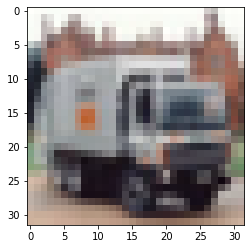

label dog


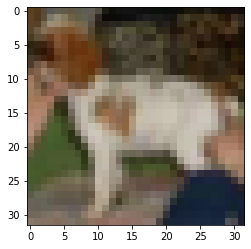

label horse


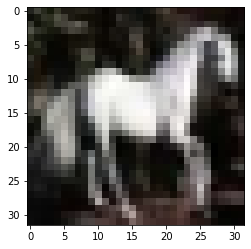

label truck


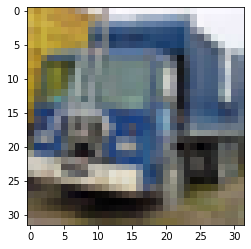

label ship


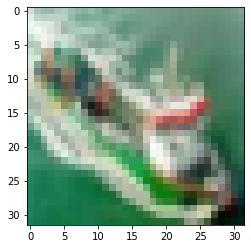

label dog


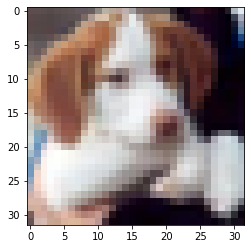

label horse


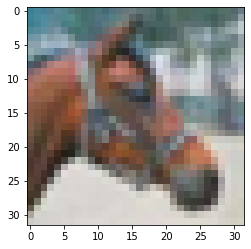

label ship


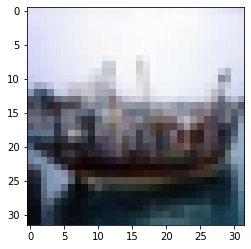

label frog


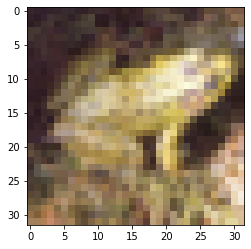

label horse


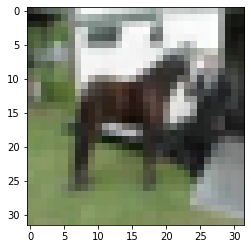

In [ ]:
print(val_img[i])
for i in range(11,21):
    plt.imshow(val_img[i])
    print("label", CATEGORYS[np.argmax(val_label[i])])
    plt.show()

# データを水増しさせる

## DataAugmentとよばれる手法
- trainの画像を回転させたり、左右反転させたりしたやつを生成して学習に使う
    - 実際に生成される画像を見た方が理解できそう
    - [Kerasでデータ拡張(Data Augmentation)後の画像を表示する](https://qiita.com/takurooo/items/c06365dd43914c253240)
- データの拡張によってtestの精度が向上するといわれている
-　kerasではImageDataGeneratorで簡単にデータを拡張できる

|  パラメータ  |  効果  |
| ---- | ---- |
|  width_shift_range  |  画像を左右にずらす  |
| height_shift_range  |  画像を上下にずらす  |
|  horizontal_flip  |  左右反転  |




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization=False,
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(
    # featurewise_center = False,
    # featurewise_std_normalization=False,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True
)

# datagen.fit(train_img,augment=True, rounds=2, seed=None)


train_img_augment = train_datagen.flow(train_img, train_label,batch_size=16)
val_img_augment = val_datagen.flow(val_img, val_label,batch_size=8)

In [ ]:
print(len(train_img))

50000


# モデルを改良

## モデルの層を増やしてみた

### メリット

- モデルの表現力が向上
    - trainの精度を上げることでtestの精度も向上するかもしれない

### Dropout層の追加

#### 過学習

- trainの精度は上がるけど、testの精度はあまり変化なくなる状態
    - モデルがtrainデータに特化したものになってしまっているため

### Dropout層とは
- 過学習を抑制させるために提案された層
- ランダムでニューラルネットワークのノードを存在しないものとする
    - 詳しい説明は[このサイト](https://medium.com/axinc/dropout%E3%81%AB%E3%82%88%E3%82%8B%E9%81%8E%E5%AD%A6%E7%BF%92%E3%81%AE%E6%8A%91%E5%88%B6-be5b9bba7e89)
    





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(Conv2D(64, (3,3), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D())
model.add(Conv2D(128, (3,3), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D())
# model.add(Conv2D(256, (3,3), padding='valid'))
# model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
# input_shape = train_img[0].shape
# print(input_shape)
# model.summary()
# history = model.fit(train_img, train_label, batch_size=16, epochs=150,verbose=1,validation_data=(val_img,val_label))
histroy = model.fit_generator(train_img_augment,epochs=150,validation_data=val_img_augment)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
3125/3125 [==============================] - 39s 12ms/step - loss: 1.9113 - accuracy: 0.2745 - val_loss: 1.7791 - val_accuracy: 0.3308
Epoch 2/150
3125/3125 [==============================] - 36s 12ms/step - loss: 1.6590 - accuracy: 0.3803 - val_loss: 1.5366 - val_accuracy: 0.4422
Epoch 3/150
3125/3125 [==============================] - 36s 12ms/step - loss: 1.5392 - accuracy: 0.4369 - val_loss: 1.4173 - val_accuracy: 0.5162
Epoch 4/150
3125/3125 [==============================] - 36s 12ms/step - loss: 1.4627 - accuracy: 0.4745 - val_loss: 1.4010 - val_accuracy: 0.4847
Epoch 5/150
3125/3125 [==============================] - 36s 12ms/step - loss: 1.3963 - accuracy: 0.5032 - val_loss: 1.3878 - val_accuracy: 0.5134
Epoch 6/150
3125/3125 [==============================] - 37s 12ms/step - loss: 1.3585 - accuracy: 0.5186 - val_loss: 1.3171 - val_accuracy: 0.5360
Epoch 7/150
3125/3125 [==============================] - 37s 12ms/step - loss: 1.3149 - accuracy: 0.5364 - val_loss: 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 64)    1792      
_________________________________________________________________
activation (Activation)      (None, None, None, 64)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, None, None, 64)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   7

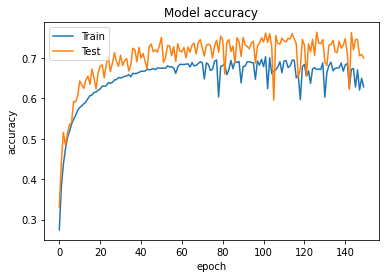

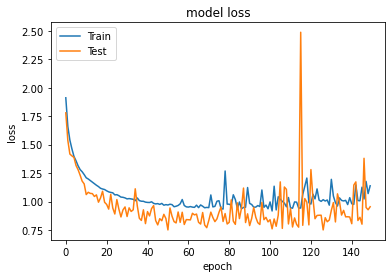

In [ ]:
plt.plot(histroy.history["accuracy"])
plt.plot(histroy.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(histroy.history["loss"])
plt.plot(histroy.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
